Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
import numpy as np
import scipy.stats as st
from plot_prob import plot_discrete_dist

# Variable aleatoria

Una variable aleatoria es una función que depende de un suceso aleatorio.

$$
X:\Omega\rightarrow \mathbb{R}
$$

donde hay una medida de probabilidad $P$ sobre el *espacio muestral* $\Omega$.

## Tipos de variables aleatorias

**Definición**: El **soporte** de una variable aleatoria es el conjunto de valores que puede tomar.

Las variables aleatorias se clasifican según su soporte:
  -  Un conjunto finito de valores (**variable aleatoria discreta y finita**).
  -  Un conjunto infinito, pero contable. Por ejemplo, los números naturales (**variable aleatoria discreta infinita**).
  -  Un conjunto continuo, como un intervalo de números reales, o el conjunto de todos los números reales (**variable aleatoria continua**).

Observad que lo importante son los posibles valores de la variable aleatoria, y no la distribución de probabilidad sobre el espacio muestral.

Por ejemplo, supongamos que el viento puede soplar en cualquier dirección, que medimos en ángulo respecto al eje proa-popa. Definimos una variable aleatoria X, que sólo toma dos posibles valores:

 - 1 si el viento viene de babor (el ángulo está entre 0 y 180).
 - 0 en otro caso.

Independientemente de la distribución de probabilidad que siga la dirección del viento, la variable aleatoria X sólo toma dos posibles valores, y por lo tanto sigue una distribución de Bernoulli.

### Simular la distribución de una variable aleatoria

Si podemos hacer extracciones aleatorias de $\Omega$ según la distribución $P$ y conocemos la definición de la variable aleatoria $X$, podemos simular la distribución de la variable aleatoria.


### Ejemplo: lanzamos tres monedas

Podemos representar el lanzamiento de tres monedas con el siguiente modelo:

 - $\Omega$ son las tuplas $(a,b,c)$ donde $a,b,c$ son tres números que puede ser 0 ó 1.
 - $P$ es una medida de probabilidad que asigna a cada tupla $w=(a,b,c)$ la misma probabilidad: $ \left(\frac{1}{2}\right)^3 = \frac{1}{8}$.

Podemos definir varias variables aleatorias asociadas a este espacio de probabilidad:

 - X = "contar el número de unos", que es lo mismo que "suma de los tres números a, b y c"
 - Y = "1 si obtuvimos el mismo resultado en los dos primeros lanzamientos, 0 si fueron distintos"
 - Z = "1 si los tres resultados fueron cara, 0 en otro caso"

## Función de masa de una variable aleatoria discreta

Para una variable aleatoria discreta $X$, definimos la **función de masa** $p_X$ como

$$
p_X(k) = P(X=k) = P(\{w\in\Omega: X(w)=k\})
$$

Si la función de masa corresponde a una distribución conocida, diremos:
  - "la variable aleatoria X sigue una distribución de Bernoulli con p=0.4"
ó 
  - "la variable aleatoria X se distribuye según una Binomial con p=0.2 y n=10"
por ejemplo.

#### Pregunta

Para el ejemplo anterior:


 - $\Omega$ son las tuplas $(a,b,c)$ donde $a,b,c$ son tres números que puede ser 0 ó 1.
 - $P$ es una medida de probabilidad que asigna a cada tupla $w=(a,b,c)$ la misma probabilidad: $ \left(\frac{1}{2}\right)^3 = \frac{1}{8}$.

Podemos definir varias variables aleatorias asociadas a este espacio de probabilidad:

 - X = "contar el número de unos", que es lo mismo que "suma de los tres números a, b y c"
 - Y = "1 si obtuvimos el mismo resultado en los dos primeros lanzamientos, 0 si fueron distintos"
 - Z = "1 si los tres resultados fueron cara, 0 en otro caso"

 - ¿Las variables aleatorias $X,Y,Z$ siguen alguna distribución conocida?
 - ¿La medida de probabilidad $P$ sigue alguna distribución conocida?

#### Pregunta

Definimos $\Omega$ como el espacio de todas las listas de n ceros o unos: ``[x1,...,xn]``, donde cada lista es igual de probable.

$T(w)$ es la suma de todos los números de la lista ``w = [x1,...,xn]``: ¿Qué distribución sigue $T$?

### Propiedad fundamental de la función de masa

La suma de todos los valores de la función de masa de una variable aleatoria discreta finita es $1$ (hay que sumar el valor en todos los elementos del soporte).

El motivo es que el soporte es un conjunto finito $F$. Para cualquier $w\in\Omega$, se tiene que $X(w)\in F$, luego:
$$
1 = P(X\in F) = \Sigma_{k\in F} \:P(X=k) =\Sigma_{k\in F} \:p_X(k)
$$

In [2]:
#Ejemplo: una distribución binomial
#La distribución depende de dos parametros
p0 = 0.2
n0 = 10
#El objeto B contiene los metodos asociados a una distribucion concreta de la familia binomial
Bin = st.binom(n=n0, p=p0)

In [3]:
#Bin.pmf es la función de masa de una VA Bin(n=10, p=0.2)
#El error se deba al redondeo del ordenador...
sum([Bin.pmf(k) for k in range(n0+1)])

0.9999999999999998

## Esperanza de una variable aleatoria discreta

Intuitivamente, la **esperanza** o **valor esperado** de una distribución de probabilidad es el **promedio** de los valores obtenidos al hacer muchas extracciones.

Si hacemos una extracción $\{x_i\}_{i=1}^N$ de tamaño N, y el valor k aparece $N_k$ veces, el promedio de los valores obtenidos es:
$$
\frac{1}{N}\Sigma_{i=1}^N \:x_i = \frac{1}{N}\Sigma_{k\in F}\: k\:N_k = \Sigma_{k\in F}\: k\frac{N_k}{N}
$$
Si $N$ es lo bastante grande, cada valor k del soporte de X aparece una proporción $p(k)$, luego $\frac{N_k}{N}\approx p(k)$:

$$
\frac{1}{N}\Sigma_{i=1}^N x_i = \Sigma_{k\in F} k\:\frac{N_k}{N} \approx \Sigma_{k\in F} k\:p(k)
$$

De forma precisa, para una VA discreta y finita son soporte $F$, **la esperanza se _define_ como**:
$$
E(X) = \Sigma_{k\in F} k\:p(k)
$$

### En `scipy.stats`

Para variables aleatorias que siguen una de las distribuciones _"estándar"_, podemos pedir a `scipy.stats` que calcule la media.

In [4]:
# Media de una distribución Binomial(n=7, p=0.8)
B = st.binom(n=7, p=0.8)
B.mean()

5.6000000000000005

In [5]:
# Media de una distribución Geometrica(p=0.8)
G = st.geom(p=4/5)
G.mean()

1.25

## Transformación de una variable aleatoria discreta: g(X)

Si
$$
X:\Omega\rightarrow \mathbb{R}
$$
es una VA con soporte finito F y $g:\mathbb{R}\rightarrow\mathbb{R}$ es una función, podemos definir una *nueva variable aleatoria*
$$
g\circ X = g(X):\Omega\rightarrow \mathbb{R}
$$
como la composición $w\rightarrow(g\circ X)(w) = g(X(w))$.

### *Soporte* de la variable aleatoria g(X)

Es la imagen $g(F)$ por $g$ del conjunto $F$. *Soporte de g(X)* = $\{f(k),\; k\in F\}$.

#### Pregunta

U es una VA que se distribuye según una UniformeDiscreta(1,3) (es decir, toma los valores 1, 2 y 3 con la misma probabilidad $\frac{1}{3}$).

¿Cuál es el soporte de $U^2$?

### Función de masa de g(X)

Si la función $g$ es inyectiva en el soporte de $U$, es fácil escribir la función de masa de la VA $g(X)$:
$$
p_{g(X)}(g(x)) = p_{X}(x)
$$
o, con un cambio de variable $y=g(X)$:
$$
p_{g(X)}(y) = p_{X}(g^{-1}(y))
$$
Por ejemplo, si U se distribuye según una UniformeDiscreta(1,3), la función de masa de $U^2$ es
$$
p_{U^2}(1)=p_U(1)=1/3,\;p_{U^2}(4)=p_U(2)=1/3,\;p_{U^2}(9)=p_U(3)=1/3\;\text{ y } 0 \text{ en otro caso.}
$$
Si $g$ no es inyectiva, es más complicado de calcular porque $g^{-1}(y)$ no está bien definido. En vez de resolver este caso de forma exacta, lo haremos mediante simulación.

> _Advertencia_: aunque una VA siga una distribución "estándar", su transformación puede que siga una distribución _que no aparece en ningún libro_.

### Muestra aleatoria de g(X)

Si $\{x_1,\dots,x_N\}$ es una muestra aleatoria de $X$, entonces
$$\{g(x_1),\dots,g(x_N)\}$$
es una muestra aleatoria de g(X).

#### Ejemplo

U es una VA que se distribuye según una UniformeDiscreta(1,100):
 - calcular la probabilidad $P(U^2>1000)$.
 - calcular la probabilidad $P((U-50)^2>1000)$.

Como $g(x)=x^2$ es inyectiva en el soporte de $U$, podemos calcular (usando que $\sqrt{1000}\approx 31.6$)
$$P(U^2>1000) = P(U>\sqrt{1000}) = P(U\geq 32) = (100-32+1)/100=0.69.$$

En el segundo caso, el cálculo es algo más complejo (y os podéis imaginar de que otras formas se puede complicar cuando $g$ no es inyectiva) 
$$
\begin{split}
P((U-50)^2>1000) &= 
P(U<50-\sqrt{1000} \text{ ó } U>50+\sqrt{1000}) \\ &=
1- P(50-\sqrt{1000}\leq U\leq 50+\sqrt{1000}) \\ &=
1-P(19\leq U\leq 81) \\ &=
1 - (81-19+1)/100 = 0.37.
\end{split}
$$

### Esperanza de g(X)

 - ¿Cuál es la *esperanza* de la variable aleatoria $g(X)$?

Según la definición:
$$
E[g(X)] = \Sigma_{b\in g(F)} b\:P(g(X) = b)
$$
Esta fórmula nos obliga a calcular la función de masa de $g(X)$, que puede ser complicado.

Hay otra forma de calcular $E[g(X)]$: observamos que b está en g(F) si y sólo si $b = g(a)$, para algún $a\in F$, y además $P(g(X) = b) = \Sigma_{\{a:\: g(a)= b\}} p(X = a)$ luego podemos reescribir la suma como:
$$
E[g(X)]  = \Sigma_{b\in g(F)} \Sigma_{\{a:\: g(a)= b\}} g(a)p(X = a) = \Sigma_{a\in F} g(a)\:p(X = a)
$$
esta fórmula es muy interesante porque sólo aparece la función de masa de X, y no necesitamos calcular la función de masa $p_{g(X)}$ de g(X):

 - $E[X] = \Sigma_{a\in F}\: a\:p(a)$
 - $E[X^2] = \Sigma_{a\in F}\: a^2\:p(a)$
 - $E[e^X] = \Sigma_{a\in F}\: e^a\:p(a)$

### Ejercicio

U es una VA que se distribuye según una UniformeDiscreta(1,3) (es decir, toma los valores 1, 2 y 3 con la misma probabilidad $\frac{1}{3}$).

Calcula de forma analítica:

 - $E[U^2]$
 - $E[3^U]$

Si no conocemos la expresión de la función de masa de $g(X)$ pero podemos simular $X$, podemos aproximar la esperanza de $g(X)$ usando una muestra aleatoria independiente:

$$
E(g(X)) \approx \frac{1}{N}\Sigma_{i=1}^N g(x_i)
$$

_veremos ésto en el laboratorio_.

## Medidas de "dispersión"

Si la esperanza de una variable aleatoria es el promedio de los valores extraídos: ¿podemos medir de alguna forma si los valores obtenidos están concentrados o separados?

Las dos VA siguientes tienen la misma media:

In [34]:
st.nbinom(n=5,p=1/21).mean(), st.nbinom(n=200,p=2/3).mean()

(100.0, 100.00000000000001)

pero la función de masa es muy distinta:

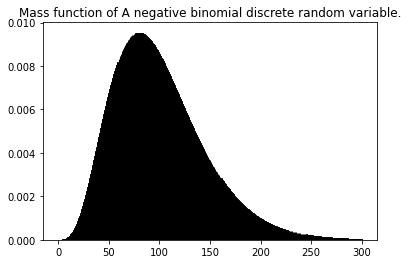

In [43]:
plot_discrete_dist(st.nbinom(n=5,p=1/21), span=(0,300))

In [42]:
plot_discrete_dist(st.nbinom(n=200,p=2/3), span=(0,300))

Por ejemplo, si X1 sigue una distribución `X1~NBinom(n=5,p=1/21)` y X2 sigue una distribución `X2~NBinom(n=200,p=2/3)` la probabilidad de que X1 sea menor que 90 es muy distinta a la probabilidad de que X2 sea menor que 90.

Nota: no vamos a estudiar en profundidad esta distribución en particular en este curso, basta con saber que es una familia de medidas de probabilidad que depende de dos parámetros. Si la Geométrica(p) registra el número de repeticiones de un proceso de Bernouilli(p) hasta el primer éxito, la NBinom(n, p) registra el número de repeticiones del mismo proceso hasta el n-ésimo éxito...

In [45]:
X1 = st.nbinom(n=5,p=1/21)
X2 = st.nbinom(n=200,p=2/3)
X1.cdf(90), X2.cdf(90)

(0.47482213642598287, 0.22206195130372952)

### Varianza y desviación típica

Las dos medidas de dispersión más habituales intentan reducir el "grado de dispersión" a un sólo número real.

 - La **varianza** es el promedio de la distancia a la media, elevada al cuadrado.
    - $X$ es una VA con función de masa p.
    - $E[X] = \Sigma_{a\in F}\: a\:p(a)$ es la esperanza de $X$ (es un número real).
    - $X - E[X]$ es una VA (a una variable aleatoria le restamos un número).
    - $(X - E[X])^2$ es una VA, resultado de transformar $X$ mediante la función $g(t) = (t - E[X])^2$
    - Definimos la **varianza** de $X$ como la esperanza de $(X - E[X])^2$:
$$
Var[X] = E[(X - E[X])^2] = \Sigma_{a\in F}\: (a - E[X])^2\:p(a)
$$

La varianza tiene las unidades de $X$ al cuadrado. Sin embargo, dado que es un promedio de números positivos, es siempre positiva, por lo que podemos tomar su raíz cuadrada positiva:
 
 - La **desviación típica** es la raíz cuadrada de la varianza, para que tenga las mismas unidades que la variable aleatoria. Es una medida de la **dispersión** de la distribución.

$$
\sigma[X] = \sqrt{Var[X]}= \sqrt{E[(X - E[X])^2]} = \sqrt{\Sigma_{a\in F}\: (a - E[X])^2\:p(a)}
$$


In [7]:
n0 = 10
p0 = 0.1
Bin = st.binom(n=n0, p=p0)
#scipy stats puede calcular el promedio, la varianza y la desviacion tipica de Bin
print(Bin.mean(), Bin.var(), Bin.std())
#Obtenemos los mismos valores que vienen en la wikipedia
print(n0*p0, n0*p0*(1-p0), np.sqrt(n0*p0*(1-p0)))

1.0 0.9 0.9486832980505138
1.0 0.9 0.9486832980505138


### Ejercicio

Un estudiante se presenta a un test y sabe la respuesta de una proporción p de las preguntas.

Si no sabe la respuesta, intentará responder al azar una de las cinco opciones disponibles.

 - Si acierta la pregunta, recibirá un 1
 - Si falla la pregunta, recibirá ``-b``, donde ``b`` es un parámetro real.

Se pide responder a estas cuestiones, de forma analítica:

  1. Define la variable aleatoria X = "puntuación en la pregunta"
  2. Si b=0, calcula la esperanza de X.
  3. Encuentra el valor de b para el que la esperanza de X es p.